In [2]:
import pandas as pd

df = pd.read_csv("SMSSpamCollection.csv",sep=";", encoding='latin-1')
   
df.flag.value_counts()/ df.flag.count()*100



flag
ham     86.598493
spam    13.401507
Name: count, dtype: float64

In [3]:
print(df[df["flag"]=="spam"]["sms"])

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5539    Want explicit SEX in 30 secs? Ring 02073162414...
5542    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549    Had your contract mobile 11 Mnths? Latest Moto...
5568    REMINDER FROM O2: To get 2.50 pounds free call...
5569    This is the 2nd time we have tried 2 contact u...
Name: sms, Length: 747, dtype: object


In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
df2=df.copy()
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

df2['sms_preprocessed'] = df2['sms'].copy()

# Lowercasing
df2['sms_preprocessed'] = df2['sms_preprocessed'].str.lower()

# Removing Punctuation
df2['sms_preprocessed'] = df2['sms_preprocessed'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Removing Stopwords
stop_words = set(stopwords.words('english')) 
df2['sms_preprocessed'] = df2['sms_preprocessed'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
df2['sms_preprocessed'] = df2['sms_preprocessed'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\To\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\To\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\To\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df2.sms[0],df2.sms_preprocessed[0]

('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'go jurong point crazy available bugis n great world la e buffet cine got amore wat')

In [6]:
df2

,flag,sms,sms_preprocessed
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5570,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5571,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion
5572,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline



X = df['sms']
y = df['flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(64,32,10), activation='relu', max_iter=1000))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       954
        spam       0.99      0.92      0.95       161

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [8]:

X = df2['sms_preprocessed']
y = df2['flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(64,32,10), activation='relu', max_iter=1000))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       954
        spam       0.97      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [9]:
df

,flag,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


test sur et sous echantillonnage 

In [10]:
from sklearn.utils import resample

# Séparer les instances par classe
df_majority = df[df['flag'] == 'ham']
df_minority = df[df['flag'] == 'spam']

# Sous-échantillonner la classe majoritaire
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # Échantillonnage sans remplacement
                                   n_samples=len(df_minority),    # Nombre d'instances égal à la classe minoritaire
                                   random_state=42)  # Reproductibilité

# Concaténer les instances de la classe minoritaire avec le sous-ensemble de la classe majoritaire
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Mélanger l'ensemble de données
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced.flag.value_counts()/ df_balanced.flag.count()*100

flag
spam    50.0
ham     50.0
Name: count, dtype: float64

In [14]:
df.shape,df_balanced.shape

((5574, 2), (1494, 2))

In [11]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from itertools import product
from sklearn.metrics import precision_score, recall_score, f1_score

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("SMSSpamCollection.csv",sep=";", encoding='latin-1')
X = df_balanced['sms']
y = df_balanced['flag']

def preprocess(text, lowercase=True, remove_punctuation=True, lemmatize=True):
    if lowercase:
        text = text.lower()
    if remove_punctuation:
        text = re.sub(r'[^\w\s]', '', text)
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        stop_words = set(stopwords.words('english'))
        text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words])
    return text

# Generate all combinations of preprocessing variants
preprocessing_variants = list(product([True, False], repeat=3))

results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

solvers = ["lbfgs", "sgd", "adam"]

results = []

for solver in solvers:
    
    for variant in preprocessing_variants:
        
        X_train_preprocessed = X_train.apply(lambda x: preprocess(x, *variant))
        X_test_preprocessed = X_test.apply(lambda x: preprocess(x, *variant))

        pipeline = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, solver=solver))
        pipeline.fit(X_train_preprocessed, y_train)

        # Predictions 
        y_train_pred = pipeline.predict(X_train_preprocessed)
        y_test_pred = pipeline.predict(X_test_preprocessed)

        # Calculate metrics
        test_f1 = f1_score(y_test, y_test_pred, pos_label='spam')
        test_precision = precision_score(y_test, y_test_pred, pos_label='spam')
        test_recall = recall_score(y_test, y_test_pred, pos_label='spam')
        train_loss = pipeline.named_steps['mlpclassifier'].loss_
        test_loss = pipeline.score(X_test_preprocessed, y_test)

        results.append({'Solvers': solver, 'Lowercase': variant[0], 'Remove Punctuation': variant[1], 'Lemmatize': variant[2], 'Test F1 Score': test_f1, 'Test Precision': test_precision, 'Test Recall': test_recall, 'Train Loss': train_loss, 'Test Loss': test_loss})

results_df = pd.DataFrame(results)


results_df= results_df.sort_values("Test F1 Score",ascending=False)
results_df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\To\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\To\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\To\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\To\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\To\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\To\AppData\L

,Solvers,Lowercase,Remove Punctuation,Lemmatize,Test F1 Score,Test Precision,Test Recall,Train Loss,Test Loss
22,adam,False,False,True,0.971831,0.985714,0.958333,0.001488,0.973244
19,adam,True,False,False,0.968198,0.985612,0.951389,0.001643,0.969900
2,lbfgs,True,False,True,0.965517,0.958904,0.972222,0.000103,0.966555
18,adam,True,False,True,0.964789,0.978571,0.951389,0.001508,0.966555
23,adam,False,False,False,0.964539,0.985507,0.944444,0.001173,0.966555
6,lbfgs,False,False,True,0.962457,0.946309,0.979167,0.000064,0.963211
21,adam,False,True,False,0.961131,0.978417,0.944444,0.001358,0.963211
17,adam,True,True,False,0.961131,0.978417,0.944444,0.001358,0.963211
15,sgd,False,False,False,0.955017,0.951724,0.958333,0.040914,0.956522
11,sgd,True,False,False,0.955017,0.951724,0.958333,0.044485,0.956522


In [19]:
def preprocess(text, lowercase=True, remove_punctuation=False, lemmatize=False):
    if lowercase:
        text = text.lower()
    if remove_punctuation:
        text = re.sub(r'[^\w\s]', '', text)
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        stop_words = set(stopwords.words('english'))
        text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words])
    return text



results2 = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_preprocessed = X_train.apply(lambda x: preprocess(x, *variant))
X_test_preprocessed = X_test.apply(lambda x: preprocess(x, *variant))

pipeline = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, solver="adam"))
pipeline.fit(X_train_preprocessed, y_train)
y_train_pred = pipeline.predict(X_train_preprocessed)
y_test_pred = pipeline.predict(X_test_preprocessed)
test_f1 = f1_score(y_test, y_test_pred, pos_label='spam')
test_precision = precision_score(y_test, y_test_pred, pos_label='spam')
test_recall = recall_score(y_test, y_test_pred, pos_label='spam')
train_loss = pipeline.named_steps['mlpclassifier'].loss_
test_loss = pipeline.score(X_test_preprocessed, y_test)

results2.append({'Solvers': solver, 'Lowercase': variant[0], 'Remove Punctuation': variant[1], 'Lemmatize': variant[2], 'Test F1 Score': test_f1, 'Test Precision': test_precision, 'Test Recall': test_recall, 'Train Loss': train_loss, 'Test Loss': test_loss})

results_df = pd.DataFrame(results2).sort_values("Test F1 Score",ascending=False)
results_df


,Solvers,Lowercase,Remove Punctuation,Lemmatize,Test F1 Score,Test Precision,Test Recall,Train Loss,Test Loss
0,adam,False,False,False,0.971631,0.992754,0.951389,0.001062,0.973244


In [20]:
import pickle

# Save the model to a file
with open('spam_classifier.pkl', 'wb') as f:
    pickle.dump(pipeline, f)


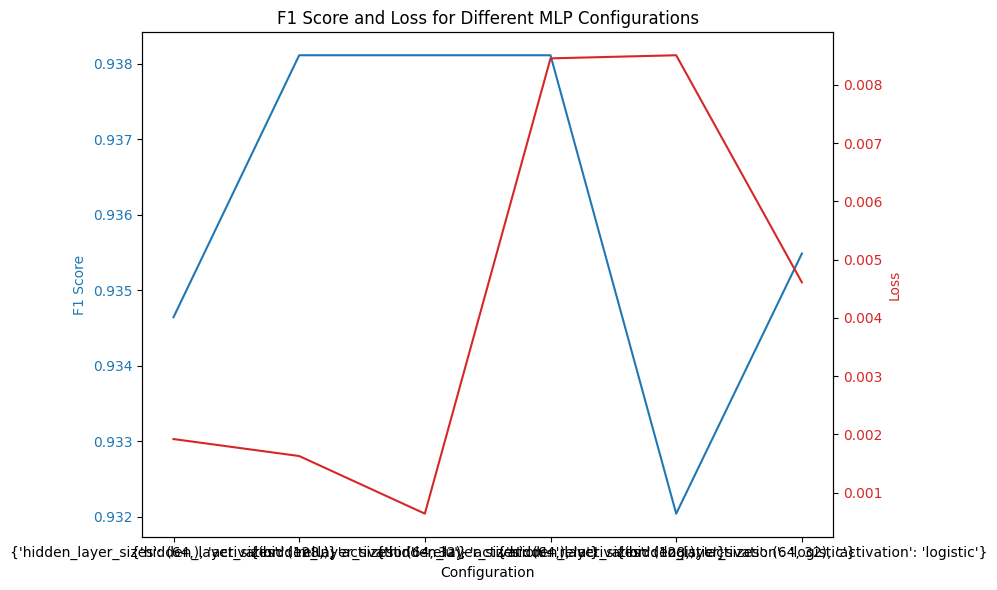

In [5]:
configurations = [
    {'hidden_layer_sizes': (64,), 'activation': 'relu'},
    {'hidden_layer_sizes': (128,), 'activation': 'relu'},
    {'hidden_layer_sizes': (64, 32), 'activation': 'relu'},
    {'hidden_layer_sizes': (64,), 'activation': 'logistic'},
    {'hidden_layer_sizes': (128,), 'activation': 'logistic'},
    {'hidden_layer_sizes': (64, 32), 'activation': 'logistic'},
]

results_df = pd.DataFrame(columns=['Configuration', 'Precision', 'Recall', 'F1', 'Loss'])

# Boucler sur chaque configuration
for i, config in enumerate(configurations):
    # Créer un pipeline avec TfidfVectorizer et MLPClassifier
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', MLPClassifier(max_iter=1000, **config))
    ])
    
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entraîner le modèle sur les données d'entraînement
    pipeline.fit(X_train, y_train)
    
    # Faire des prédictions sur les données de test
    y_pred = pipeline.predict(X_test)
    
    # Calculer les métriques de performance
    precision = precision_score(y_test, y_pred, pos_label='spam')
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    
    # Collecter la perte après l'entraînement
    loss = pipeline.named_steps['clf'].loss_
    
    # Stocker les résultats dans le DataFrame
    results_df.loc[i] = [config, precision, recall, f1, loss]

results_df

# Visualiser les résultats avec un graphique
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot F1 Score
ax1.plot(results_df.index, results_df['F1'], label='F1 Score', color='tab:blue')
ax1.set_xlabel('Configuration')
ax1.set_ylabel('F1 Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for Loss
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['Loss'], label='Loss', color='tab:red')
ax2.set_ylabel('Loss', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('F1 Score and Loss for Different MLP Configurations')
plt.xticks(results_df.index, [str(config) for config in configurations], rotation=45)
fig.tight_layout()
plt.show()


         Layers Activation  Precision    Recall        F1      Loss
0         (64,)       relu   0.986207  0.888199  0.934641  0.002021
1        (128,)       relu   0.986395  0.900621  0.941558  0.001639
2      (64, 32)       relu   0.986207  0.888199  0.934641  0.000325
3   (64, 32, 6)       relu   0.986301  0.894410  0.938111  0.000421
4  (32, 32, 32)       relu   0.972973  0.894410  0.932039  0.000205


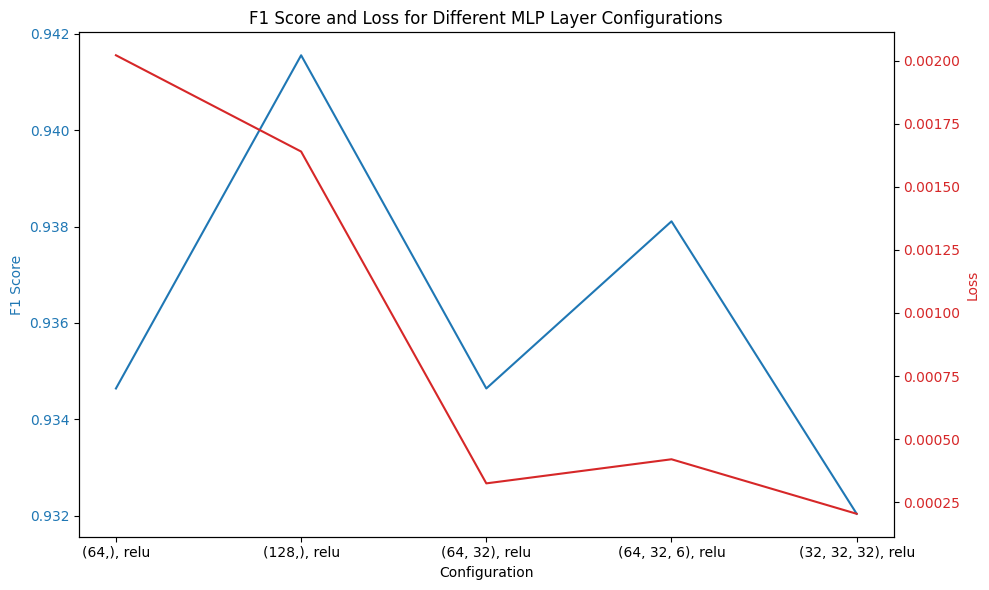

In [8]:
import itertools

layer_sizes = [(64,), (128,), (64, 32),(64, 32,6),(32,32,32)]
activations = ['relu']

results_df = pd.DataFrame(columns=['Layers', 'Activation', 'Precision', 'Recall', 'F1', 'Loss'])

# Générer toutes les combinaisons de layer_sizes et d'activations
layer_combinations = list(itertools.product(layer_sizes, activations))

# Boucler sur chaque combinaison de couches et d'activation
for i, (layer_size, activation) in enumerate(layer_combinations):
    # Créer un pipeline avec TfidfVectorizer et MLPClassifier
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', MLPClassifier(max_iter=1000, hidden_layer_sizes=layer_size, activation=activation, random_state=42))
    ])
    
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entraîner le modèle sur les données d'entraînement
    pipeline.fit(X_train, y_train)
    
    # Faire des prédictions sur les données de test
    y_pred = pipeline.predict(X_test)
    
    # Calculer les métriques de performance
    precision = precision_score(y_test, y_pred, pos_label='spam')
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')
    
    # Collecter la perte après l'entraînement
    loss = pipeline.named_steps['clf'].loss_
    
    # Stocker les résultats dans le DataFrame
    results_df.loc[i] = [layer_size, activation, precision, recall, f1, loss]

# Afficher les résultats
print(results_df)

# Visualiser les résultats avec un graphique
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot F1 Score
ax1.plot(results_df.index, results_df['F1'], label='F1 Score', color='tab:blue')
ax1.set_xlabel('Configuration')
ax1.set_ylabel('F1 Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for Loss
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['Loss'], label='Loss', color='tab:red')
ax2.set_ylabel('Loss', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('F1 Score and Loss for Different MLP Layer Configurations')
plt.xticks(results_df.index, [f'{layer_size}, {activation}' for layer_size, activation in layer_combinations], rotation=45)
fig.tight_layout()
plt.show()


c:\Users\To\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\To\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\To\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


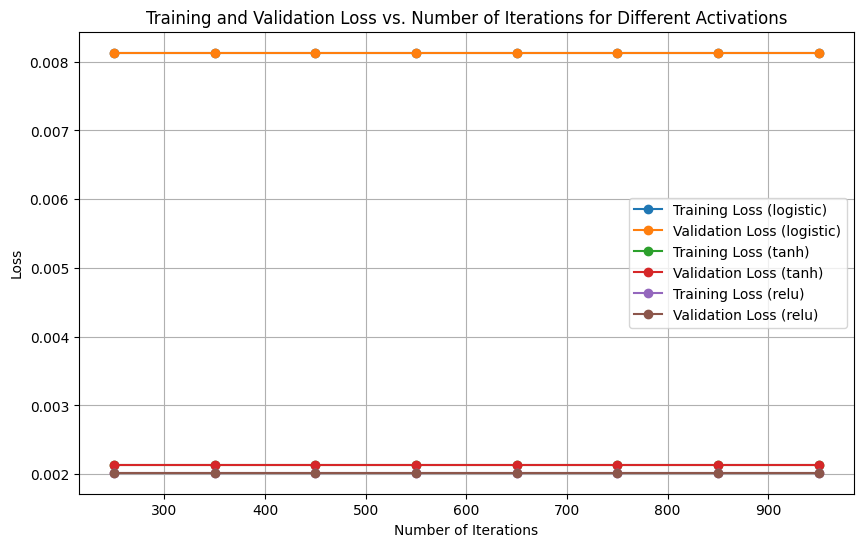

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

activations = ['logistic', 'tanh', 'relu']

losses = {activation: [] for activation in activations}
val_losses = {activation: [] for activation in activations}


iterations = np.arange(50, 1001, 100)

for activation in activations:
    
    for iteration in iterations:
        
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('clf', MLPClassifier(hidden_layer_sizes=(64,), activation=activation, max_iter=iteration, random_state=42))
        ])
        
        
        pipeline.fit(X_train, y_train)
        
        
        losses[activation].append(pipeline.named_steps['clf'].loss_)
        val_losses[activation].append(pipeline.named_steps['clf'].loss_curve_[-1])  


plt.figure(figsize=(10, 6))
for activation in activations:
    plt.plot(iterations[2:], losses[activation][2:], label=f'Training Loss ({activation})', marker='o')
    plt.plot(iterations[2:], val_losses[activation][2:], label=f'Validation Loss ({activation})', marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Number of Iterations for Different Activations')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
results_df

,Configuration,Precision,Recall,F1
